# Marcela Melgar
## 20200487

In [144]:
# library import
import numpy as np
import pandas as pd

In [145]:
# data set import
titanicmd= pd.read_csv('titanic_MD.csv')
titanic= pd.read_csv('titanic.csv')

In [146]:
titanicmd.head(15)
#titanicmd.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",?,38.0,1.0,0.0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.0000,D56,S
6,24,1,1,"Sloper, Mr. William Thompson",?,NaN,0.0,0.0,113788,35.5000,A6,S
7,28,0,1,"Fortune, Mr. Charles Alexander",?,19.0,3.0,2.0,19950,263.0000,C23 C25 C27,S
8,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1.0,NaN,PC 17572,76.7292,D33,C
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.9792,B30,C


In [147]:
# visualizacion valores dentro de columna sexo
np.unique(titanicmd['Sex'])
#print(np.unique(titanicmd['Sex']))

array(['?', 'female', 'male'], dtype=object)

In [148]:
# variables con algun valor na
titanicmd.isna().sum()
#print(titanicmd.isna().sum())

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

In [149]:
# columnas con cantidad de valores ?
cols = []
val = []
for col in titanicmd.select_dtypes(include='object').columns:
    cols.append(col)
    val.append(titanicmd[col].str.contains(r'\?').sum())
pd.DataFrame({
    'cols':cols,
    'val':val
})

,cols,val
0,Name,0
1,Sex,51
2,Ticket,0
3,Cabin,0
4,Embarked,0


In [150]:
# cambio de valores a na
titanicmd.replace(r'\?', np.nan, regex = True, inplace = True)

In [151]:
titanicmd.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

In [152]:
# eliminacion de todos los valores na
titanicmd.dropna().shape

(100, 12)

In [153]:
from sklearn.impute import SimpleImputer

In [154]:
# imputacion de sexo moda
imp_modeS = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_modeS.fit_transform(titanicmd[['Sex']])

array([['male'],
       ['female'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],

In [155]:
# imputacion de edad media
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit_transform(titanicmd[['Age']])

array([[38.        ],
       [35.        ],
       [54.        ],
       [35.69253165],
       [58.        ],
       [34.        ],
       [35.69253165],
       [19.        ],
       [49.        ],
       [65.        ],
       [45.        ],
       [29.        ],
       [25.        ],
       [35.69253165],
       [46.        ],
       [71.        ],
       [23.        ],
       [21.        ],
       [47.        ],
       [24.        ],
       [35.69253165],
       [54.        ],
       [19.        ],
       [37.        ],
       [24.        ],
       [36.5       ],
       [22.        ],
       [61.        ],
       [56.        ],
       [50.        ],
       [35.69253165],
       [ 3.        ],
       [44.        ],
       [58.        ],
       [ 2.        ],
       [40.        ],
       [31.        ],
       [32.        ],
       [38.        ],
       [35.69253165],
       [44.        ],
       [37.        ],
       [35.69253165],
       [62.        ],
       [30.        ],
       [52

In [156]:
# imputacion mode edad moda
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mode.fit_transform(titanicmd[['Age']])

array([[38.  ],
       [35.  ],
       [54.  ],
       [24.  ],
       [58.  ],
       [34.  ],
       [24.  ],
       [19.  ],
       [49.  ],
       [65.  ],
       [45.  ],
       [29.  ],
       [25.  ],
       [24.  ],
       [46.  ],
       [71.  ],
       [23.  ],
       [21.  ],
       [47.  ],
       [24.  ],
       [24.  ],
       [54.  ],
       [19.  ],
       [37.  ],
       [24.  ],
       [36.5 ],
       [22.  ],
       [61.  ],
       [56.  ],
       [50.  ],
       [24.  ],
       [ 3.  ],
       [44.  ],
       [58.  ],
       [ 2.  ],
       [40.  ],
       [31.  ],
       [32.  ],
       [38.  ],
       [24.  ],
       [44.  ],
       [37.  ],
       [24.  ],
       [62.  ],
       [30.  ],
       [52.  ],
       [40.  ],
       [24.  ],
       [35.  ],
       [37.  ],
       [63.  ],
       [19.  ],
       [36.  ],
       [ 2.  ],
       [50.  ],
       [ 0.92],
       [17.  ],
       [30.  ],
       [24.  ],
       [18.  ],
       [31.  ],
       [40.  ],
       [

In [157]:
# imputacion mediana edad
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit_transform(titanicmd[['Age']])

array([[38.  ],
       [35.  ],
       [54.  ],
       [35.5 ],
       [58.  ],
       [34.  ],
       [35.5 ],
       [19.  ],
       [49.  ],
       [65.  ],
       [45.  ],
       [29.  ],
       [25.  ],
       [35.5 ],
       [46.  ],
       [71.  ],
       [23.  ],
       [21.  ],
       [47.  ],
       [24.  ],
       [35.5 ],
       [54.  ],
       [19.  ],
       [37.  ],
       [24.  ],
       [36.5 ],
       [22.  ],
       [61.  ],
       [56.  ],
       [50.  ],
       [35.5 ],
       [ 3.  ],
       [44.  ],
       [58.  ],
       [ 2.  ],
       [40.  ],
       [31.  ],
       [32.  ],
       [38.  ],
       [35.5 ],
       [44.  ],
       [37.  ],
       [35.5 ],
       [62.  ],
       [30.  ],
       [52.  ],
       [40.  ],
       [35.5 ],
       [35.  ],
       [37.  ],
       [63.  ],
       [19.  ],
       [36.  ],
       [ 2.  ],
       [50.  ],
       [ 0.92],
       [17.  ],
       [30.  ],
       [24.  ],
       [18.  ],
       [31.  ],
       [40.  ],
       [

In [158]:
# imputacion de sibsp media
imp_meanSp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_meanSp.fit_transform(titanicmd[['SibSp']])

array([[1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.46111111],
       [0.        ],
       [0.        ],
       [3.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [3.        ],
       [0.46111111],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [2.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [2.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.   

In [159]:
# imputacion sp moda
imp_modeSp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_modeSp.fit_transform(titanicmd[['SibSp']])

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [3.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [160]:
# imputacion sp mediana
imp_medianSp = SimpleImputer(missing_values=np.nan, strategy='median')
imp_medianSp.fit_transform(titanicmd[['SibSp']])

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [3.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [161]:
# imputacion parch media
imp_meanP = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_meanP.fit_transform(titanicmd[['Parch']])

array([[0.       ],
       [0.       ],
       [0.       ],
       [0.4619883],
       [0.       ],
       [0.       ],
       [0.       ],
       [2.       ],
       [0.4619883],
       [1.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [2.       ],
       [0.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [2.       ],
       [0.4619883],
       [0.       ],
       [2.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [0.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.4619883],
       [1.       ],
       [0.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],


In [162]:
# imputacion parch moda
imp_modeP = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_modeP.fit_transform(titanicmd[['Parch']])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [163]:
# imputacion mediana parch
imp_medianP = SimpleImputer(missing_values=np.nan, strategy='median')
imp_medianP.fit_transform(titanicmd[['Parch']])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [164]:
# imputacion fare media
imp_meanF = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_meanF.fit_transform(titanicmd[['Fare']])

array([[ 71.2833    ],
       [ 53.1       ],
       [ 51.8625    ],
       [ 16.7       ],
       [ 26.55      ],
       [ 13.        ],
       [ 35.5       ],
       [263.        ],
       [ 76.7292    ],
       [ 61.9792    ],
       [ 83.475     ],
       [ 10.5       ],
       [ 78.95919086],
       [263.        ],
       [ 61.175     ],
       [ 34.6542    ],
       [ 63.3583    ],
       [ 77.2875    ],
       [ 52.        ],
       [247.5208    ],
       [ 13.        ],
       [ 77.2875    ],
       [ 26.2833    ],
       [ 53.1       ],
       [ 79.2       ],
       [ 26.        ],
       [ 66.6       ],
       [ 33.5       ],
       [ 30.6958    ],
       [ 28.7125    ],
       [ 39.        ],
       [ 26.        ],
       [ 27.7208    ],
       [146.5208    ],
       [ 10.4625    ],
       [ 31.        ],
       [113.275     ],
       [ 78.95919086],
       [ 90.        ],
       [ 83.475     ],
       [ 90.        ],
       [ 52.5542    ],
       [ 10.4625    ],
       [ 26

In [165]:
# imputacion mediana fare
imp_medianF = SimpleImputer(missing_values=np.nan, strategy='median')
imp_medianF.fit_transform(titanicmd[['Fare']])

array([[ 71.2833],
       [ 53.1   ],
       [ 51.8625],
       [ 16.7   ],
       [ 26.55  ],
       [ 13.    ],
       [ 35.5   ],
       [263.    ],
       [ 76.7292],
       [ 61.9792],
       [ 83.475 ],
       [ 10.5   ],
       [ 56.9292],
       [263.    ],
       [ 61.175 ],
       [ 34.6542],
       [ 63.3583],
       [ 77.2875],
       [ 52.    ],
       [247.5208],
       [ 13.    ],
       [ 77.2875],
       [ 26.2833],
       [ 53.1   ],
       [ 79.2   ],
       [ 26.    ],
       [ 66.6   ],
       [ 33.5   ],
       [ 30.6958],
       [ 28.7125],
       [ 39.    ],
       [ 26.    ],
       [ 27.7208],
       [146.5208],
       [ 10.4625],
       [ 31.    ],
       [113.275 ],
       [ 56.9292],
       [ 90.    ],
       [ 83.475 ],
       [ 90.    ],
       [ 52.5542],
       [ 10.4625],
       [ 26.55  ],
       [ 56.9292],
       [ 79.65  ],
       [  0.    ],
       [153.4625],
       [135.6333],
       [ 29.7   ],
       [ 77.9583],
       [ 91.0792],
       [ 12.

In [166]:
# imputacion embarked moda
imp_modeE = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_modeE.fit_transform(titanicmd[['Embarked']])

array([['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['C'],
       ['C'],
       ['C'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
      

In [167]:
# regresion lineal
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

SibSp avg without prediction: 0.46


/var/folders/g3/vf5hsnz52lx1427rxhv8zm_80000gn/T/ipykernel_4494/518924636.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanicmd['SibSp'])


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

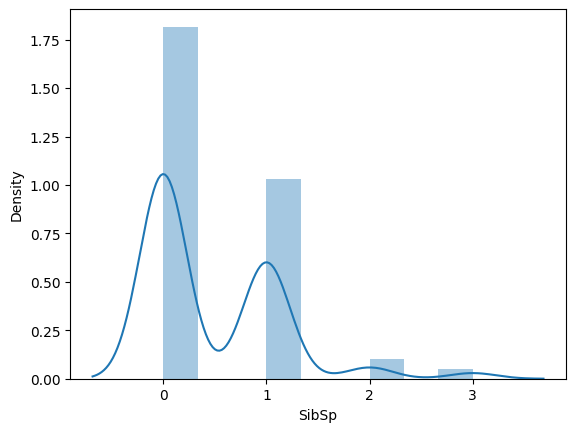

In [168]:
# modelo regresion lineal de edad
print('SibSp avg without prediction:', round(titanicmd['SibSp'].mean(),2))
sns.distplot(titanicmd['SibSp'])

In [169]:
# correlacion dataset titanic completo
titanicmd.corr()

/var/folders/g3/vf5hsnz52lx1427rxhv8zm_80000gn/T/ipykernel_4494/2810141024.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanicmd.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,-0.048190,-0.088806,-0.062083,0.022261
Survived,0.148495,1.000000,-0.034542,-0.257703,0.113987,-0.003365,0.119311
Pclass,-0.089136,-0.034542,1.000000,-0.297872,-0.102294,0.041969,-0.304438
Age,-0.048190,-0.257703,-0.297872,1.000000,-0.087951,-0.279548,-0.130979
SibSp,-0.088806,0.113987,-0.102294,-0.087951,1.000000,0.255152,0.299061
Parch,-0.062083,-0.003365,0.041969,-0.279548,0.255152,1.000000,0.381445
Fare,0.022261,0.119311,-0.304438,-0.130979,0.299061,0.381445,1.000000


In [170]:
# desviacion estandard de edad
f = 2
xl = titanicmd['Age'].mean() - (titanicmd['Age'].std() * f)
xu = titanicmd['Age'].mean() + (titanicmd['Age'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: 4.410816187965786
Upper value: 66.97424710317347


<AxesSubplot:xlabel='PassengerId', ylabel='Age'>

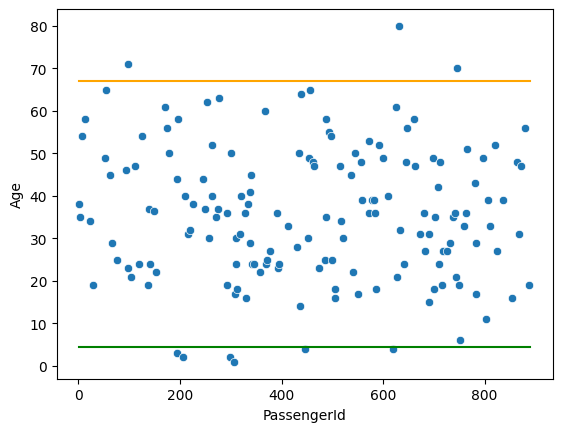

In [171]:
sns.scatterplot(x = titanicmd['PassengerId'], y = titanicmd['Age'])
sns.lineplot(x = titanicmd['PassengerId'], y = xl, color = 'green')
sns.lineplot(x = titanicmd['PassengerId'], y = xu, color = 'orange')

In [172]:
# estadisticas sibsp
tmdA_sd = titanicmd[(titanicmd['Age']>=xl) & (titanicmd['Age']<=xu)]
tmdA_sd[['SibSp']].describe()

,SibSp
count,147.000000
mean,0.455782
std,0.621876
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [173]:
# estadisticas edad y edad con desviacion estandar
titanicmd['Age_sd'] = np.where(
    titanicmd['Age']<xl,
    xl,
    np.where(
        titanicmd['Age']>xu,
        xu,
        titanicmd['SibSp']
    )
)

In [174]:
titanicmd[['Age', 'Age_sd']].describe()

,Age,Age_sd
count,158.000000,180.000000
mean,35.692532,1.691042
std,15.640858,8.575543
min,0.920000,0.000000
25%,24.000000,0.000000
50%,35.500000,0.000000
75%,48.000000,1.000000
max,80.000000,66.974247


In [175]:
# desviacion estandard sibsp
f = 2
xl = titanicmd['SibSp'].mean() - (titanicmd['SibSp'].std() * f)
xu = titanicmd['SibSp'].mean() + (titanicmd['SibSp'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: -0.8311328579137273
Upper value: 1.7533550801359494


<AxesSubplot:xlabel='PassengerId', ylabel='SibSp'>

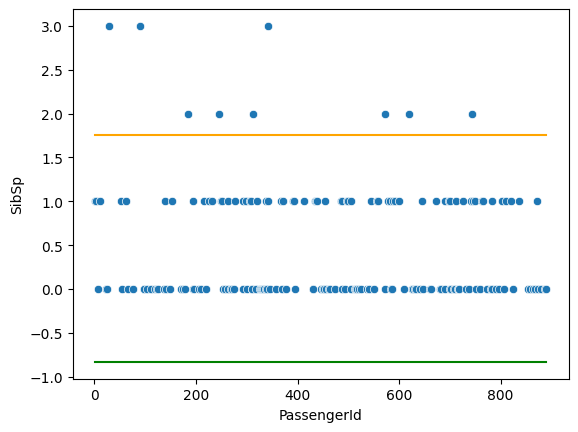

In [176]:
sns.scatterplot(x = titanicmd['PassengerId'], y = titanicmd['SibSp'])
sns.lineplot(x = titanicmd['PassengerId'], y = xl, color = 'green')
sns.lineplot(x = titanicmd['PassengerId'], y = xu, color = 'orange')

In [177]:
# estadisticas sibsp
tmd_sd = titanicmd[(titanicmd['SibSp']>=xl) & (titanicmd['SibSp']<=xu)]
tmd_sd[['SibSp']].describe()

,SibSp
count,171.000000
mean,0.362573
std,0.482155
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [178]:
# estadisticas sibsp con sibsp desviacion estandar
titanicmd['SibSp_sd'] = np.where(
    titanicmd['SibSp']<xl,
    xl,
    np.where(
        titanicmd['SibSp']>xu,
        xu,
        titanicmd['SibSp']
    )
)

In [179]:
titanicmd[['SibSp', 'SibSp_sd']].describe()

,SibSp,SibSp_sd
count,180.000000,180.000000
mean,0.461111,0.432112
std,0.646122,0.559621
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,3.000000,1.753355


In [180]:
# sd embarked desviacion estandar 
f = 2
xl = titanicmd['SibSp'].mean() - (titanicmd['SibSp'].std() * f)
xu = titanicmd['SibSp'].mean() + (titanicmd['SibSp'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: -0.8311328579137273
Upper value: 1.7533550801359494


<AxesSubplot:xlabel='PassengerId', ylabel='Embarked'>

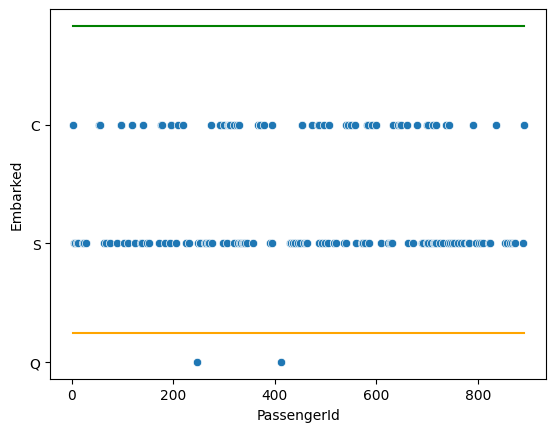

In [181]:
sns.scatterplot(x = titanicmd['PassengerId'], y = titanicmd['Embarked'])
sns.lineplot(x = titanicmd['PassengerId'], y = xl, color = 'green')
sns.lineplot(x = titanicmd['PassengerId'], y = xu, color = 'orange')

In [182]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
178,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
179,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
180,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
181,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [183]:
# valor z de estandarizacion
from sklearn.preprocessing import StandardScaler

In [184]:
# valor z dataset
scaler = StandardScaler()
tmd_z = titanicmd.copy()
for col in tmd_z.select_dtypes(include=['float', 'int']).columns:
    tmd_z[col+'_z'] = scaler.fit_transform(tmd_z[[col]])

tmd_z.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,SibSp_sd,PassengerId_z,Survived_z,Pclass_z,Age_z,SibSp_z,Parch_z,Fare_z,Age_sd_z,SibSp_sd_z
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,1.0,-1.840135,0.698430,-0.372256,0.147997,0.836362,-0.614977,-0.099939,-0.080808,1.017602
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,1.0,-1.832017,0.698430,-0.372256,-0.044418,0.836362,-0.614977,-0.336682,-0.080808,1.017602
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,0.0,-1.819841,-1.431782,-0.372256,1.174212,-0.715650,-0.614977,-0.352794,-0.197744,-0.774305
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,1.0,-1.803606,0.698430,3.520480,NaN,0.836362,NaN,-0.810604,-0.080808,1.017602
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,NaN,-1.799547,0.698430,-0.372256,1.430765,NaN,-0.614977,-0.682359,NaN,NaN


In [185]:
# estadisticas dataset con desviaciones y valor z
tmd_z.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_sd,SibSp_sd,PassengerId_z,Survived_z,Pclass_z,Age_z,SibSp_z,Parch_z,Fare_z,Age_sd_z,SibSp_sd_z
count,183.000000,183.000000,183.000000,158.000000,180.000000,171.000000,175.000000,180.000000,180.000000,183.000000,1.830000e+02,1.830000e+02,1.580000e+02,1.800000e+02,1.710000e+02,1.750000e+02,1.800000e+02,1.800000e+02
mean,455.366120,0.672131,1.191257,35.692532,0.461111,0.461988,78.959191,1.691042,0.432112,0.000000,4.853434e-17,3.882747e-17,-1.967484e-16,-5.921189e-17,2.077610e-17,5.075305e-18,-2.467162e-17,-2.467162e-17
std,247.052476,0.470725,0.515187,15.640858,0.646122,0.753435,77.026328,8.575543,0.559621,1.002743,1.002743e+00,1.002743e+00,1.003180e+00,1.002789e+00,1.002937e+00,1.002869e+00,1.002789e+00,1.002789e+00
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.840135,-1.431782e+00,-3.722562e-01,-2.230255e+00,-7.156502e-01,-6.149769e-01,-1.028035e+00,-1.977437e-01,-7.743049e-01
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,0.000000,0.000000,-0.778752,-1.431782e+00,-3.722562e-01,-7.499403e-01,-7.156502e-01,-6.149769e-01,-6.413461e-01,-1.977437e-01,-7.743049e-01
50%,457.000000,1.000000,1.000000,35.500000,0.000000,0.000000,56.929200,0.000000,0.000000,0.006632,6.984303e-01,-3.722562e-01,-1.234867e-02,-7.156502e-01,-6.149769e-01,-2.868267e-01,-1.977437e-01,-7.743049e-01
75%,676.000000,1.000000,1.000000,48.000000,1.000000,1.000000,90.539600,1.000000,1.000000,0.895515,6.984303e-01,-3.722562e-01,7.893814e-01,8.363623e-01,7.161756e-01,1.507749e-01,-8.080772e-02,1.017602e+00
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,66.974247,1.753355,1.764104,6.984303e-01,3.520480e+00,2.841810e+00,3.940387e+00,4.709633e+00,5.642402e+00,7.633955e+00,2.367544e+00


In [186]:
# min max scaler
from sklearn.preprocessing import MinMaxScaler

In [187]:
scaler = MinMaxScaler()
tmd_norm = titanicmd.copy()
for col in tmd_norm.select_dtypes(include=['float', 'int']).columns:
    tmd_norm[col+'_norm'] = scaler.fit_transform(tmd_norm[[col]])

tmd_norm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,SibSp_sd,PassengerId_norm,Survived_norm,Pclass_norm,Age_norm,SibSp_norm,Parch_norm,Fare_norm,Age_sd_norm,SibSp_sd_norm
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,1.0,0.000000,1.0,0.0,0.468892,0.333333,0.0,0.139136,0.014931,0.570335
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,1.0,0.002252,1.0,0.0,0.430956,0.333333,0.0,0.103644,0.014931,0.570335
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,0.0,0.005631,0.0,0.0,0.671219,0.000000,0.0,0.101229,0.000000,0.000000
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,1.0,0.010135,1.0,1.0,NaN,0.333333,NaN,0.032596,0.014931,0.570335
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,NaN,0.011261,1.0,0.0,0.721801,NaN,0.0,0.051822,NaN,NaN


In [188]:
tmd_norm.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_sd,SibSp_sd,PassengerId_norm,Survived_norm,Pclass_norm,Age_norm,SibSp_norm,Parch_norm,Fare_norm,Age_sd_norm,SibSp_sd_norm
count,183.000000,183.000000,183.000000,158.000000,180.000000,171.000000,175.000000,180.000000,180.000000,183.000000,183.000000,183.000000,158.000000,180.000000,171.000000,175.000000,180.000000,180.000000
mean,455.366120,0.672131,1.191257,35.692532,0.461111,0.461988,78.959191,1.691042,0.432112,0.510547,0.672131,0.095628,0.439713,0.153704,0.115497,0.154118,0.025249,0.246449
std,247.052476,0.470725,0.515187,15.640858,0.646122,0.753435,77.026328,8.575543,0.559621,0.278212,0.470725,0.257593,0.197785,0.215374,0.188359,0.150345,0.128042,0.319172
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,0.000000,0.000000,0.294482,0.000000,0.000000,0.291856,0.000000,0.000000,0.057971,0.000000,0.000000
50%,457.000000,1.000000,1.000000,35.500000,0.000000,0.000000,56.929200,0.000000,0.000000,0.512387,1.000000,0.000000,0.437279,0.000000,0.000000,0.111118,0.000000,0.000000
75%,676.000000,1.000000,1.000000,48.000000,1.000000,1.000000,90.539600,1.000000,1.000000,0.759009,1.000000,0.000000,0.595346,0.333333,0.250000,0.176722,0.014931,0.570335
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,66.974247,1.753355,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
